In [4]:
import datetime as dt
import sys
sys.path.insert(0,'../..')
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from rivapy.tools.datetime_grid import DateTimeGrid

from rivapy.models.residual_demand_fwd_model import WindPowerForecastModel, MultiRegionWindForecastModel, ResidualDemandForwardModel
from rivapy.instruments.ppa_specification import GreenPPASpecification
from rivapy.models.residual_demand_model import SmoothstepSupplyCurve
import numpy as np
from scipy.special import comb

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single WindPowerForecast Model

In [185]:
days = 2
timegrid = np.linspace(0.0, days*1.0/365.0, days*24)
forward_expiries = [timegrid[-10] +i/(365.0*24.0) for i in range(4)]#
#forward_expiries = [timegrid[-1] + i for i in range(4)]
n_sims = 10_000
wind_onshore = WindPowerForecastModel(region='Onshore', speed_of_mean_reversion=0.001, volatility=3.30)
rnd = np.random.normal(size=wind_forecast_model.rnd_shape(n_sims, timegrid.shape[0]))
results = wind_onshore.simulate(timegrid, rnd, 
                                       expiries=forward_expiries, 
                                       initial_forecasts=[0.8, 0.7,0.6,0.5])


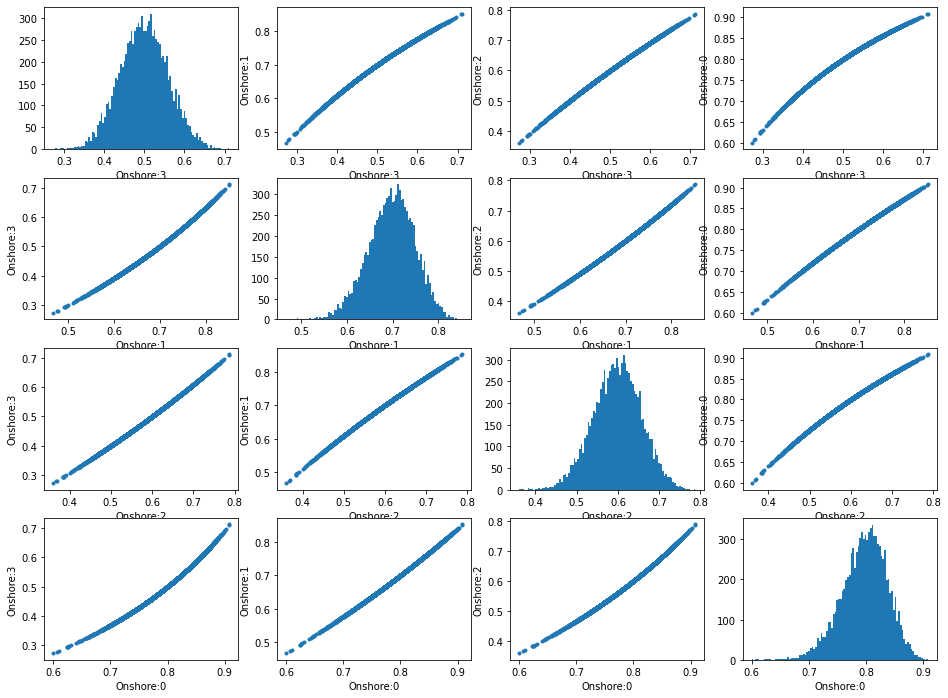

In [186]:
timepoint = -1
plt.figure(figsize=(16,12))
i=1
for k in results.keys():
    f1 = results.get(k)
    for l in results.keys():
        plt.subplot(4,4,i)
        f2 = results.get(l)
        if k==l:
            plt.hist(f1[timepoint], bins=100, label=k)
            plt.xlabel(k)
        else:
            plt.plot(f1[timepoint], f2[timepoint], '.')
            plt.xlabel(k)
            plt.ylabel(l)
        i += 1


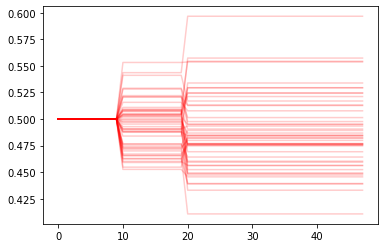

In [187]:
for k in results.keys():
    tmp = results.get(k, forecast_timepoints=[10, 20])
    for i in range(50):
        plt.plot(tmp[:,i], '-r', alpha=0.2)
    break

# Multiregion Windpower Model

In [188]:
#wind = wind_forecast_model.simulate(timegrid, rnd)
wind_offshore = WindPowerForecastModel(region='Offshore', speed_of_mean_reversion=0.001, volatility=3.30)
regions = [ MultiRegionWindForecastModel.Region( 
                                    wind_onshore,
                                    capacity=1000.0,
                                    rnd_weights=[0.7,0.3]
                                ),
           MultiRegionWindForecastModel.Region( 
                                    wind_offshore,
                                    capacity=500.0,
                                    rnd_weights=[0.3,0.7]
                                )
           
          ]
wind = MultiRegionWindForecastModel('Wind_Germany', regions)

In [191]:
rnd = np.random.normal(size=wind.rnd_shape(n_sims, timegrid.shape[0]))
results = wind.simulate(timegrid, rnd, expiries=forward_expiries, 
                                       initial_forecasts={'Onshore': [0.8, 0.7,0.6,0.5],
                                                          'Offshore': [0.6,0.6,0.6,0.6]}
                               )

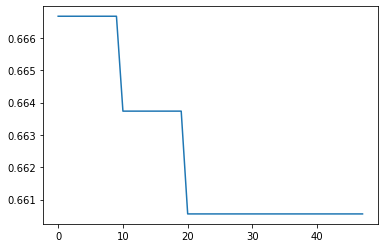

In [192]:
tmp = results.get('Wind_Germany:1', forecast_timepoints=[10, 20])
plt.plot(tmp[:,0]);

In [196]:
forward_expiries
timegrid[-10]

array([0.        , 0.00011658, 0.00023317, 0.00034975, 0.00046634,
       0.00058292, 0.0006995 , 0.00081609, 0.00093267, 0.00104926,
       0.00116584, 0.00128242, 0.00139901, 0.00151559, 0.00163218,
       0.00174876, 0.00186535, 0.00198193, 0.00209851, 0.0022151 ,
       0.00233168, 0.00244827, 0.00256485, 0.00268143, 0.00279802,
       0.0029146 , 0.00303119, 0.00314777, 0.00326435, 0.00338094,
       0.00349752, 0.00361411, 0.00373069, 0.00384727, 0.00396386,
       0.00408044, 0.00419703, 0.00431361, 0.0044302 , 0.00454678,
       0.00466336, 0.00477995, 0.00489653, 0.00501312, 0.0051297 ,
       0.00524628, 0.00536287, 0.00547945])